# Linear Regression

For both of the Python classes you implement, return the intercept θ0, the coefficient θ1, the R2 value, the F statistic and the associated p-value

## Linear Regression (analytical solution)

In [138]:
import numpy as np
import pandas as pd
from scipy.stats import f
import random as r
import matplotlib.pyplot as plt

In [163]:
class myAnalyticalLinearRegression:
    
    def __init__(self, data):
        
        # initialize
        self.data = data
        self.x = self.data.iloc[:,0]
        self.y = self.data.iloc[:,1]
        self.n = len(self.x)
        self.dfn = None
        self.dfd = None
        # linear equation values
        self.theta0 = None
        self.theta1 = None
        self.ybar = self.y.mean()
        # stats
        self.Rsquared = None
        self.Fstat = None
        self.Pvalue = None
        # sum of squares and mean squares
        self.ssTot = None
        self.ssReg = None
        self.ssErr = None
        self.msTot = None
        self.msReg = None
        self.msErr = None
    
    def fit(self):
        self.calc_df()
        self.calc_theta1()
        self.calc_theta0()
        self.calc_ssTot()
        self.calc_ssReg()
        self.calc_ssErr()
        self.calc_msTot()
        self.calc_msReg()
        self.calc_msErr()
        return print(f"Data read: n = {self.n}")
        
    def transform(self):
        self.calc_Fstat()
        self.calc_Rsquared()
        self.calc_Pvalue()
        return print(f"y={round(self.theta0,3)} + {round(self.theta1,3)}x\nIntercept θ0: {round(self.theta0,3)}\nCoefficient θ1: {round(self.theta1,3)}\nR2: {round(self.Rsquared,3)}\nF statistic: {round(self.Fstat,3)}\nP value: {self.Pvalue}")
    
    def fit_transform(self):
        self.fit()
        self.trasnform()
    
    def calc_df(self):
        observations,groups = self.data.shape
        self.dfn = groups - 1
        self.dfd = (observations) - groups
        return self.dfn,self.dfd
    
    def calc_theta1(self):
        cov = self.x.cov(self.y)
        varx = self.x.var() 
        self.theta1 = cov/varx
        
    def calc_theta0(self):
        xbar = self.x.mean()
        slope = xbar * self.theta1
        self.theta0 = self.ybar - slope
        
    def calc_yhat(self,xval):
        return self.theta0 + (self.theta1 * xval)
    
    def calc_ssTot(self):
        ssTot = 0
        for i in self.y:
            ssTot += (i - self.ybar)**2
        self.ssTot = ssTot
        
    def calc_ssReg(self):
        ssReg = 0
        for i in self.x:
            ssReg += (self.calc_yhat(i) - self.ybar)**2
        self.ssReg = ssReg
    
    def calc_ssErr(self):
        residualSquared = 0
        for i in range(len(self.y)):
            yi = self.y[i]
            yihat = self.calc_yhat(self.x[i])
            residualSquared += (yi - yihat)**2
        self.ssErr = residualSquared
    
    def calc_msTot(self):
        self.msTot = self.ssTot / (self.n - 1)
        return self.msTot
    
    def calc_msReg(self):
        self.msReg = self.ssReg / 1
    
    def calc_msErr(self):
        self.msErr = self.ssErr / (self.n - 2)
    
    def calc_Fstat(self):
        self.Fstat = self.msReg / self.msErr
    
    def calc_Rsquared(self):
        self.Rsquared = self.ssReg / self.ssTot
    
    def calc_Pvalue(self):
        self.Pvalue = f.sf(self.Fstat, self.dfn, self.dfd)
                   

In [164]:
raw_data = pd.read_csv("linear_regression_test_data.csv",index_col=0)
test = raw_data[['x','y']]
test.head()

,x,y
0,-1.919126,-3.091213
1,-1.715856,-3.534291
2,-1.651483,-3.146432
3,-0.466234,-1.359516
4,-0.305381,-1.887257


In [165]:
testA = myAnalyticalLinearRegression(test)

In [166]:
testA.fit()

Data read: n = 20


In [167]:
testA.transform()

y=0.025 + 1.934x
Intercept θ0: 0.025
Coefficient θ1: 1.934
R2: 0.929
F statistic: 236.366
P value: 8.52900501738634e-12


## Linear Regression (gradient descent solution)

In [172]:
class myGradientDescentLinearRegression:
    
    jStop = 0.00001
    alpha = 0.05
    maxIterations = 10000
    
    def __init__(self, data):
        
        # initialize
        self.data = data
        self.x = self.data.iloc[:,0]
        self.y = self.data.iloc[:,1]
        self.n = len(self.x)
        self.dfn = None
        self.dfd = None
        # linear equation values
        self.theta0 = None
        self.theta1 = None
        self.deltaJ = None
        self.ybar = self.y.mean()
        # stats
        self.Rsquared = None
        self.Fstat = None
        self.Pvalue = None
        # sum of squares and mean squares
        self.ssTot = None
        self.ssReg = None
        self.ssErr = None
        self.msTot = None
        self.msReg = None
        self.msErr = None
    
    def fit(self):
        self.calc_df()
        self.gradient_descent()
        self.calc_ssTot()
        self.calc_ssErr()
        self.calc_ssReg()
        self.calc_msTot()
        self.calc_msReg()
        self.calc_msErr()
        return print(f"Data read: n = {self.n}")
        
    def transform(self):
        self.calc_Fstat()
        self.calc_Rsquared()
        self.calc_Pvalue()
        return print(f"y={round(self.theta0,3)} + {round(self.theta1,3)}x\nIntercept θ0: {round(self.theta0,3)}\nCoefficient θ1: {round(self.theta1,3)}\nR2: {round(self.Rsquared,3)}\nF statistic: {round(self.Fstat,3)}\nP value: {self.Pvalue}")
    
    def fit_transform(self):
        self.fit()
        self.trasnform()
        
    def calc_df(self):
        observations,groups = self.data.shape
        self.dfn = groups - 1
        self.dfd = (observations) - groups
        return self.dfn,self.dfd
    
    def gradient_descent(self):
        self.theta1 = 0
        self.theta0 = 0
        self.calc_deltaJ()
        iterations = 0
        while self.deltaJ > myGradientDescentLinearRegression.jStop:
            self.calc_newTheta0()
            self.calc_newTheta1()
            self.calc_deltaJ()
            iterations += 1
            if iterations == myGradientDescentLinearRegression.maxIterations:
                break
            
    def calc_deltaJ(self):
        m = self.n
        self.calc_ssErr()
        ri2 = self.ssErr
        self.deltaJ = (1/(2*m)) * ri2 
    
    def calc_newTheta0(self):
        sumOf = 0
        for i in range(self.n):
            sumOf += (self.theta0 + self.theta1*self.x[i] - self.y[i])
        partialDerivativeTheta0 = ( 1/(self.n) ) * sumOf
        newTheta0 = self.theta0 - myGradientDescentLinearRegression.alpha*(partialDerivativeTheta0)
        self.theta0 = newTheta0
    
    
    def calc_newTheta1(self):
        sumOf = 0
        for i in range(self.n):
            sumOf += (self.theta0 + self.theta1*self.x[i] - self.y[i])*self.x[i]
        partialDerivativeTheta1 = ( 1/(self.n) ) * sumOf
        newTheta1 = self.theta1 - myGradientDescentLinearRegression.alpha*(partialDerivativeTheta1)
        self.theta1 = newTheta1
    
    def calc_yhat(self,xval):
        return self.theta0 + (self.theta1 * xval)
      
    def calc_ssTot(self):
        ssTot = 0
        for i in self.y:
            ssTot += (i - self.ybar)**2
        self.ssTot = ssTot
        
    def calc_ssReg(self):
        ssReg = 0
        for i in self.x:
            ssReg += (self.calc_yhat(i) - self.ybar)**2
        self.ssReg = ssReg
    
    def calc_ssErr(self):
        residualSquared = 0
        for i in range(len(self.y)):
            yi = self.y[i]
            yihat = self.calc_yhat(self.x[i])
            residualSquared += (yi - yihat)**2
        self.ssErr = residualSquared
    
    def calc_msTot(self):
        self.msTot = self.ssTot / (self.n - 1)
    
    def calc_msReg(self):
        self.msReg = self.ssReg / 1
    
    def calc_msErr(self):
        self.msErr = self.ssErr / (self.n - 2)
    
    def calc_Fstat(self):
        self.Fstat = self.msReg / self.msErr
    
    def calc_Rsquared(self):
        self.Rsquared = self.ssReg / self.ssTot
    
    def calc_Pvalue(self):
        self.Pvalue = f.sf(self.Fstat, self.dfn, self.dfd)
                   

In [173]:
testGD = myGradientDescentLinearRegression(test)

In [174]:
testGD.fit()

Data read: n = 20


In [175]:
testGD.transform()

y=0.025 + 1.934x
Intercept θ0: 0.025
Coefficient θ1: 1.934
R2: 0.929
F statistic: 236.366
P value: 8.529005017386446e-12


# PCA and Linear Regression

In [176]:
class myPCA:
    
    def __init__(self, data):
        # make class take pandas or numpy array
        if isinstance(data, pd.DataFrame):
            self.data = data.to_numpy()
        elif isinstance(data, np.ndarray):
            self.data = data
        else:
            pass
        self.n_components = self.data.shape[1]   
        self.mean_val = None
        self.mc = None # X matrix, mean centered data
        self.cov = None
        self.eigenvalues = None # for scree plot
        self.eigenvectors = None # p matrix
        self.scores = None # y matrix
        self.var = None
    
    def __repr__(self):
        return np.array_str(self.data)
    
    def mean(self):
        self.mean_val = np.mean(self.data,axis=0, keepdims=True)
        return self.mean_val
    
    def mean_centered(self):
        if self.mean_val is None:
            self.mean() 
            
        self.mc = np.real(self.data - self.mean_val)

        return self.mc
    
    # p matrix
    def covariance_matrix(self):
        if self.mc is None:
            self.mean_centered()
            
        self.cov = np.cov(self.mc, rowvar=False) # rowvar False means rows are samples and columns are variables
        return self.cov
    
    def eigendecomposition(self):
        if self.cov is None:
            self.covariance_matrix()
        
        self.eigenvalues,self.eigenvectors = np.linalg.eig(self.cov)

        sorted_indices = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_indices].tolist()
        self.eigenvectors = self.eigenvectors[:, sorted_indices]
        return self.eigenvectors 
        
    def variance_explained(self):
        if self.eigenvalues is None:
            self.eigendecomposition()
            
        var_total = sum(self.eigenvalues)
        self.var = []
        for x in self.eigenvalues:
            var = x/var_total
            self.var.append(var)
        self.var = np.real(self.var)
        return self.var 
    
    def project_data(self):
         # y matrix/ scores
        if self.eigenvectors is None:
            self.eigendecomposition()
        
        self.scores = np.real(np.dot(self.mc, self.eigenvectors))
        return self.scores
    
    def loading_plot(self):  
        x_values = np.real(self.eigenvectors[:,0])
        y_values = np.real(self.eigenvectors[:,1])
        plt.scatter(x_values,y_values,c='blue')
        plt.title("Loading Plot")
        plt.xlabel(f"PC1: {round(self.var[0]*100,2)}%")
        plt.ylabel(f"PC2: {round(self.var[1]*100,2)}%")
        return 
    
    def scree_plot(self):
        plt.plot(np.real(self.eigenvalues), marker="o", linewidth=0,markerfacecolor='blue')
        plt.title('Scree Plot') 
        plt.xlabel('Principal Component')
        plt.ylabel('Eigenvalue')
        return 
    
    def scores_plot(self):
        pca_df = self.transform()
        x1 = pca_df[:,0]
        x2 = pca_df[:,1]
        l,d = np.shape(pca_df)
        ll = int(l//2) # dimensions
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x1[:ll], x2[:ll], color = "blue")
        ax.scatter(x1[ll:], x2[ll:], color = "red")
        ax.set_title("Scores Plot")
        ax.set_xlabel(f"PC1: {round(self.var[0]*100,2)}%")
        ax.set_ylabel(f"PC2: {round(self.var[1]*100,2)}%")
        return 
    
    def fit(self):
        # return learned p matrix/ loadings
        self.mean_centered()
        self.covariance_matrix()
        self.eigendecomposition()
        self.variance_explained()
        return f"PCA fit: n_components={self.n_components}"
    
    def transform(self):
        # return scores (y=xp)
        self.project_data()
        return self.scores
    
    def fit_transform(self):
        self.fit()
        return self.transform()
    

## Perform PCA on x and y using your own PCA class. Plot y vs x, y-theoretical vs x, and the PC1 axis in the same plot

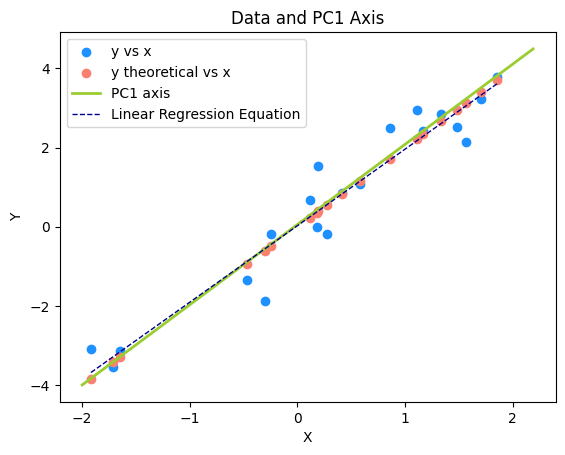

In [177]:
pcaXY = myPCA(test)
pcaXY.fit_transform()

testxytheoretical = raw_data[['x','y_theoretical']]
pcaXYtheoretical = myPCA(testxytheoretical)
pcaXYtheoretical.fit_transform()

# sorted eigenvectors
pc1 = pcaXY.eigendecomposition().T

x = test['x']
y = test['y']
k = 5

y_theoretical = testxytheoretical['y_theoretical']
plt.scatter(x,y,label="y vs x", color="DodgerBlue")
plt.scatter(x,y_theoretical, label="y theoretical vs x", color="salmon")
plt.plot([-2, -k*pc1[0,0]], [-4, -k*pc1[1,0]], label='PC1 axis', color='YellowGreen', linestyle='-',linewidth = 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and PC1 Axis')
plt.legend()

# 2b, add regression line from linear regression classes above
x_values = np.linspace(x.min(), x.max(), 100)
y_regression = 0.025 + 1.934 * x_values
plt.plot(x_values, y_regression, label='Linear Regression Equation', color='darkblue', linestyle="--",linewidth=1)
plt.legend()


## Perform linear regression on x and y with x being the independent variable and y being the dependent variable. Plot the regression line in the same plot as you obtained in (1). 
### Compare the PC1 axis and the regression line obtained above. Are they very different or very similar? Could you explain why this happens?

<font color = red> (see plot above)
    
The regression line of best fit and the prinicpal component 1 axis follow very similar trends, but they are not identical.  This could be because the eigenvectors calculated using PCA are slightly different than the values calcuated using linear regression , but they both follow the trend of the data that can explain the most variation.   